In [1]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt

In [25]:
# Kepler's equation
def kepler(x, e, t):
    y = x - e * sin(x) - t
    return y

def dkepler(x, e, t):
    y = 1 - e * cos(x)
    return y

In [34]:
def newton_method(x0, F, dF, RTOL, ATOL, *args):
    """
    Newton's Method: 
    Fixed point iteration to find root x* of F for a starting value x0 close enough to x*
    """
    xk = x0
    i = 0
    repeat = 1
    while (repeat):
        i+=1
        print("iteration = ", i)
        
        xkplus1 = xk - F(xk, *args) / dF(xk, *args) # 1 Step of fixed point iteration
        
        print("xk = ", xk, ", xk+1 = ", xkplus1, "\n")
        if (np.abs(xkplus1 - xk) <= abs(xkplus1) * RTOL + ATOL):
            print("Convergence to x = ", xkplus1)
            repeat = 0
            return xkplus1
        
        xk = xkplus1        

In [35]:
x0 = 0.7
e = 0.4
t = 0.4
tol = 1e-15
xkplus1 = newton_method(x0, kepler, dkepler, tol, tol, e, t)

iteration =  1
xk =  0.7 , xk+1 =  0.6390359124760184 

iteration =  2
xk =  0.6390359124760184 , xk+1 =  0.638347826754796 

iteration =  3
xk =  0.638347826754796 , xk+1 =  0.6383477435758264 

iteration =  4
xk =  0.6383477435758264 , xk+1 =  0.638347743575825 

Convergence to x =  0.638347743575825


In [39]:
# Check if solution found by Newton mtehod is a root of kepler's equation for the given params
abs(kepler(xkplus1, e, t)) < tol

True

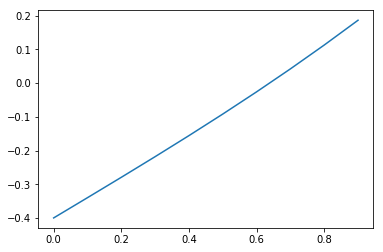

In [40]:
x = np.arange(0, 1, 0.1)
y = [kepler(x[i], e, t) for i in range(len(x))]
plt.plot(x, y)
None